<a href="https://colab.research.google.com/github/lucaasnathan/AprendizadoMaquinaSupervisionado/blob/main/AprendizadoMaquinaSupervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome dos integrantes: Lucas Nathan de Oliveira e Mateus dos anjos

Turma (BSI - Quarta)

Especificações técnicas para o trabalho de Aprendizado Supervisionado do 2º bimestre:

O dataset a ser treinado precisa possuir a coluna alvo para classificação. Para este trabalho os datasets do Kaggle podem ser utilizados, lembrando que espera-se os comentários sobre os resultados e a descrição das colunas (dicionário de dados se existir) para entender o problema. O dataset precisa estar limpo, sem campos nulos, e com os tipos devidamente formatados. Dados categóricos e numéricos para treinamento são necessários.

Critérios de avaliação:

1.5 sendo 0.5 para cada algoritmo implementado corretamente (Árvore de decisão, Random Forests e Regressão Logística) com comentários e código e a respectivas comparação final entre os mesmos. 0.5 para a organização do arquivo e contribuição (caso seja dupla). 1.0 para apresentação do trabalho a ser avaliado de forma individual como defesa de código.

Importando Pandas e bibliotecas:



In [345]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

In [346]:
df = pd.read_csv('/content/drive/MyDrive/ciencia_de_dados/Trabalho 3.0/exams.csv', 
                 sep=',', encoding='iso-8859-1')

In [347]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [348]:
df.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Buscando valores que possuem em cada coluna:

In [349]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [350]:
df['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [351]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [352]:
df['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [353]:
df['math score'].unique()

array([ 67,  40,  59,  77,  78,  63,  62,  93,  47,  99,  80,  74,  81,
        69,  58,  54,  23,  39,  83,  71,  44,  46,  51,  53,  33,  87,
        65,  79,  68,  57,  98, 100,  60,  64,  52,  36,  56,  88,  42,
        76,  49,  72,  31,  32,  97,  94,  95,  45,  75,  66,  70,  82,
        92,  30,  41,  43,  55,  73,  48,  86,  84,  50,  89,  91,  85,
        61,  35,  90,  96,  13,  38,  28,  26,  37,  29,  34,  25])

In [354]:
df['reading score'].unique()

array([ 67,  59,  60,  78,  73,  77,  88,  56,  42,  83,  87,  74,  61,
        47,  62,  44,  32,  76,  52,  69,  55,  38,  45,  68,  89,  54,
        79,  41,  65,  81,  75,  70,  46,  63,  72,  58,  53,  57,  80,
        51,  66,  82,  93,  64,  91,  43,  71, 100,  50,  33,  34,  90,
        84,  95,  98,  92,  85,  49,  86,  48,  94,  36,  28,  39,  29,
        96,  97,  40,  27,  37,  99,  31,  35])

In [355]:
df['writing score'].unique()

array([ 63,  55,  50,  68,  76,  84,  65,  45,  85,  90,  73,  57,  42,
        44,  31,  88,  54,  32,  56,  60,  89,  51,  77,  39,  71,  74,
        75,  72,  64,  82,  70,  87,  78,  49,  47,  62,  83,  48,  59,
        97,  81,  67,  69,  61,  93, 100,  53,  79,  58,  33,  86,  66,
        46,  80,  91,  92,  95,  99,  96,  28,  52,  24,  40,  43,  94,
        23,  38,  30,  35,  41,  98,  36,  27,  26,  34,  37])

In [356]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Alterando o nome das colunas para português e excluindo coluna 'LUNCH' que não vai ser utilizada no momento

In [357]:
df.rename(columns={'gender': 'genero'}, inplace=True)
df.rename(columns={'race/ethnicity': 'raca'}, inplace=True)
df.rename(columns={'parental level of education': 'escolaridade_dos_pais'}, inplace=True)
df.rename(columns={'test preparation course': 'preparacao_para_teste'}, inplace=True)
df.rename(columns={'math score': 'pontuacao_matematica'}, inplace=True)
df.rename(columns={'reading score': 'pontuacao_leitura'}, inplace=True)
df.rename(columns={'writing score': 'pontuacao_escrita'}, inplace=True)
df.drop(columns={'lunch'}, inplace=True)

In [341]:
df

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,male,group A,high school,completed,67,67,63
1,female,group D,some high school,none,40,59,55
2,male,group E,some college,none,59,60,50
3,male,group B,high school,none,77,78,68
4,male,group E,associate's degree,completed,78,73,68
...,...,...,...,...,...,...,...
995,male,group C,high school,none,73,70,65
996,male,group D,associate's degree,completed,85,91,92
997,female,group C,some high school,none,32,35,41
998,female,group C,some college,none,73,74,82


Buscando existencia de valores ausentes

In [358]:
df.isnull().sum()


genero                   0
raca                     0
escolaridade_dos_pais    0
preparacao_para_teste    0
pontuacao_matematica     0
pontuacao_leitura        0
pontuacao_escrita        0
dtype: int64

Buscando orientação dos tipos de coluna:

In [359]:
df.dtypes


genero                   object
raca                     object
escolaridade_dos_pais    object
preparacao_para_teste    object
pontuacao_matematica      int64
pontuacao_leitura         int64
pontuacao_escrita         int64
dtype: object

informando a quantidade de linhas e colunas:

In [361]:
print('Número de Linhas = ',df.shape[0])
print('Número de Colunas = ',df.shape[1])

Número de Linhas =  1000
Número de Colunas =  7


In [362]:
df.shape

(1000, 7)

Transformando as variáveis categóricas nominais em variáveis categóricas 


In [540]:
df['genero'].replace({'female':0, 'male':1}, inplace=True)
df['preparacao_para_teste'].replace({'none':0, 'completed': 1}, inplace=True)
df['raca'].replace({'group A': 1,'group B': 2,'group C': 3,'group D': 4,'group E': 5 }, inplace=True)
df['escolaridade_dos_pais'].replace({'high school':1,'some high school':2, 'some college':3, "associate's degree":4, 
                                    "bachelor's degree":5, "master's degree":6}, inplace=True)


In [541]:
df.dtypes

genero                   int64
raca                     int64
escolaridade_dos_pais    int64
preparacao_para_teste    int64
pontuacao_matematica     int64
pontuacao_leitura        int64
pontuacao_escrita        int64
dtype: object

In [542]:
df

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,1,1,1,1,67,67,63
1,0,4,2,0,40,59,55
2,1,5,3,0,59,60,50
3,1,2,1,0,77,78,68
4,1,5,4,1,78,73,68
...,...,...,...,...,...,...,...
995,1,3,1,0,73,70,65
996,1,4,4,1,85,91,92
997,0,3,2,0,32,35,41
998,0,3,3,0,73,74,82


In [602]:
previsores = df.iloc[:, 0:5].values


In [632]:
previsores

array([[ 1,  1,  1,  1, 67],
       [ 0,  4,  2,  0, 40],
       [ 1,  5,  3,  0, 59],
       ...,
       [ 0,  3,  2,  0, 32],
       [ 0,  3,  3,  0, 73],
       [ 1,  1,  3,  1, 65]])

In [633]:
previsores.shape

(1000, 5)

In [634]:
alvo = df.iloc[:, 3].values

In [635]:
alvo

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [636]:
alvo.shape

(1000,)

In [637]:
df.describe()

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.517000,3.161000,3.042000,0.335000,66.396000,69.002000,67.738000
std,0.499961,1.132414,1.510138,0.472227,15.402871,14.737272,15.600985
min,0.000000,1.000000,1.000000,0.000000,13.000000,27.000000,23.000000
25%,0.000000,2.000000,2.000000,0.000000,56.000000,60.000000,58.000000
50%,1.000000,3.000000,3.000000,0.000000,66.500000,70.000000,68.000000
75%,1.000000,4.000000,4.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,5.000000,6.000000,1.000000,100.000000,100.000000,100.000000


In [638]:
from sklearn.preprocessing import StandardScaler

In [639]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [640]:
previsores_esc

array([[ 0.96655883, -1.90926764, -1.35287099,  1.40892676,  0.03923309],
       [-1.03459817,  0.74126587, -0.69034847, -0.7097601 , -1.714564  ],
       [ 0.96655883,  1.62477704, -0.02782595, -0.7097601 , -0.48041049],
       ...,
       [-1.03459817, -0.1422453 , -0.69034847, -0.7097601 , -2.23420758],
       [-1.03459817, -0.1422453 , -0.02782595, -0.7097601 ,  0.42896578],
       [ 0.96655883, -1.90926764, -0.02782595,  1.40892676, -0.0906778 ]])

In [641]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4
0,0.966559,-1.909268,-1.352871,1.408927,0.039233
1,-1.034598,0.741266,-0.690348,-0.709760,-1.714564
2,0.966559,1.624777,-0.027826,-0.709760,-0.480410
3,0.966559,-1.025756,-1.352871,-0.709760,0.688788
4,0.966559,1.624777,0.634697,1.408927,0.753743
...,...,...,...,...,...
995,0.966559,-0.142245,-1.352871,-0.709760,0.428966
996,0.966559,0.741266,0.634697,1.408927,1.208431
997,-1.034598,-0.142245,-0.690348,-0.709760,-2.234208
998,-1.034598,-0.142245,-0.027826,-0.709760,0.428966


# Treino e Teste


In [642]:
from sklearn.model_selection import train_test_split


In [643]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)


In [644]:
x_treino.shape

(700, 5)

In [645]:
x_teste.shape

(300, 5)

In [646]:
y_treino.shape

(700,)

In [647]:
y_teste.shape

(300,)

#ÁRVORE DE DECISÃO

In [648]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [650]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.75, 'X[3] <= 0.35\nentropy = 0.93\nsamples = 700\nvalue = [458, 242]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 458\nvalue = [458, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 242\nvalue = [0, 242]')]

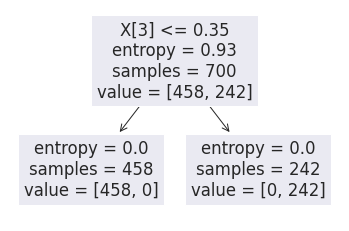

In [651]:
tree.plot_tree(_arvore)

In [652]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [653]:
y_teste

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [654]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [655]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 100.00%


In [656]:
confusion_matrix(y_teste, previsoes_arvore)

array([[207,   0],
       [  0,  93]])

In [657]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00        93

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [658]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [659]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [660]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 100.00%


Acuracia de 100%

In [661]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [662]:
confusion_matrix(y_treino, previsoes_treino)

array([[458,   0],
       [  0, 242]])


#RANDOM FOREST

In [663]:
from sklearn.ensemble import RandomForestClassifier

In [664]:
random = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500,
                       random_state=0)

In [665]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [666]:
y_teste

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [667]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [668]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 100.00%


In [669]:
confusion_matrix(y_teste, previsoes_random)

array([[207,   0],
       [  0,  93]])

In [670]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00        93

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [671]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [672]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [673]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 100.00%


In [674]:
confusion_matrix(y_treino, previsoes_treino)

array([[458,   0],
       [  0, 242]])

#Regressão Logística

In [675]:
from sklearn.linear_model import LogisticRegression

In [676]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [677]:
logistica.intercept_

array([-1.97643593])

In [678]:
logistica.coef_

array([[ 1.00708055e-03, -6.04962728e-02, -2.16783982e-02,
         4.70642226e+00,  1.51083292e-01]])

In [679]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [680]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [681]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 100.00%


In [682]:
confusion_matrix(y_teste, previsoes_logistica)

array([[207,   0],
       [  0,  93]])

In [683]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00        93

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [684]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [685]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [686]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 100.00%


In [687]:
confusion_matrix(y_treino, previsoes_treino)

array([[458,   0],
       [  0, 242]])

**COMPARAÇÃO FINAL EM TREINO**

Árvore de Decisão: 84.33%

Random Forest: 90.71%

Regressão Logística: 90.71%